In [ ]:
from google.colab import drive
drive.mount('/content/drive')


#How to add the file to gdrive

1. Open the drive link shared
2. Click the three dots next to ***HV-AI-2024*** and select 'Make a copy'

In [ ]:
!cp (original_location) /content/HV-AI-2024.zip
!unzip HV-AI-2024.zip
!rm -rf /content/__MACOSX
!mv /content/HV-AI-2024/* /content/
!rm -rf /content/HV-AI-2024
!rm /content/HV-AI-2024.zip
!rm -rf /content/sample_data
from google.colab import output
output.clear()

# **Plot Sample Images**

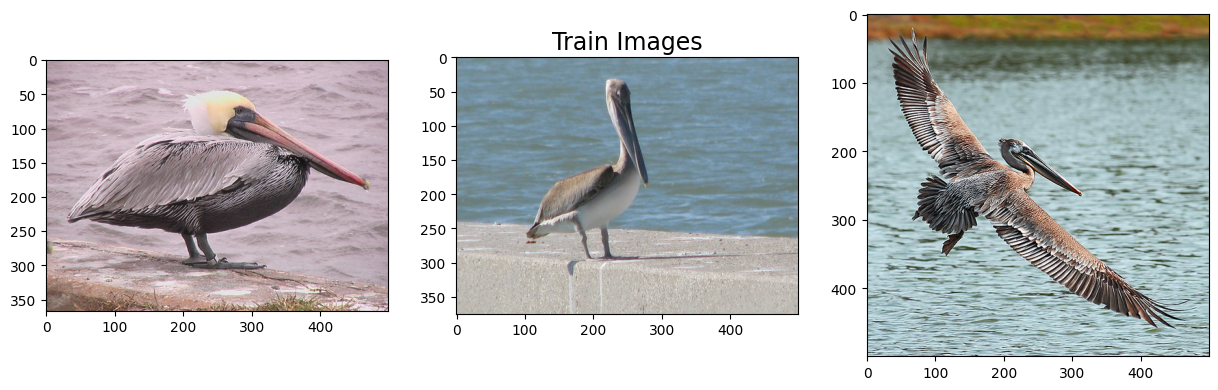

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from glob import glob


train_images = glob('HV-AI-2024/images/train/*.jpg')[0:3]
test_images = glob('HV-AI-2024/images/test/*.jpg')[0:3]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, image in enumerate(train_images):
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img)

axes[1].set_title('Train Images',fontsize=17)
plt.show()

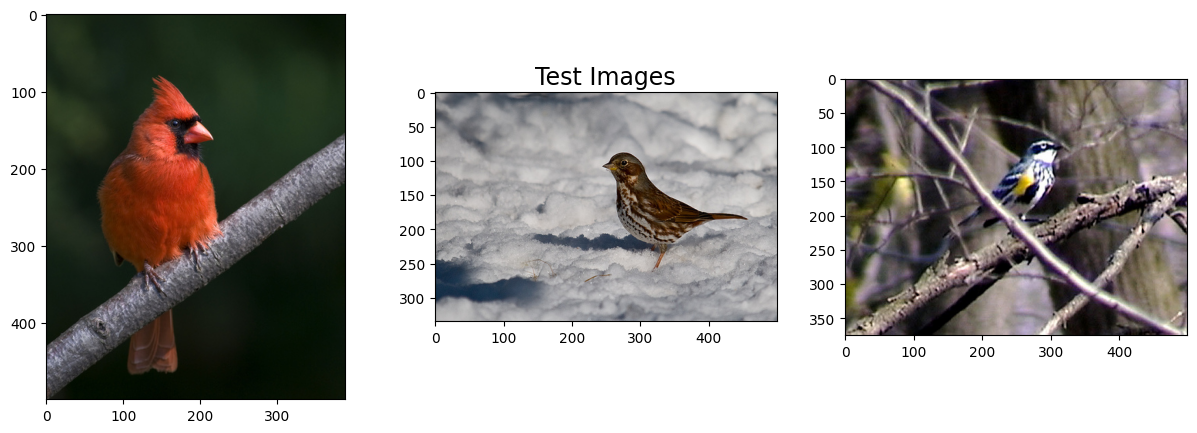

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, image in enumerate(test_images):
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img)

axes[1].set_title('Test Images',fontsize=17)
plt.show()

# **Load/Preprocess **data****

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from PIL import Image
import pandas as pd

In [ ]:
# Function to crop an image based on bounding box
def show_crop_image(image_path, bbox, target_size=(224, 224)):
    img = load_img(image_path)
    img_array = img_to_array(img)

    # Parse bounding box values
    x1, y1, x2, y2 = [int(float(coord)) for coord in bbox.split()]

    # Crop the image using the bounding box
    cropped_img = img_array[y1:y1+y2, x1:x1+x2, :]

    # Convert the cropped image back to a PIL image object and resize
    cropped_img_pil = Image.fromarray(cropped_img.astype('uint8'))
    cropped_img_pil.show()

image_path = r"HV-AI-2024\images/test/test_81.jpg"
bbox = "241.0 113.0 202.0 257.0"

show_crop_image(image_path, bbox)

In [ ]:
train_df = pd.read_csv('HV-AI-2024/train.csv')
test_df = pd.read_csv('HV-AI-2024/test.csv')

# Function to crop an image based on bounding box
def crop_image(image_path, bbox, target_size=(224, 224)):
    img = load_img(image_path)
    img_array = img_to_array(img)

    # Parse bounding box values
    x1, y1, x2, y2 = [int(float(coord)) for coord in bbox.split()]

    # Crop the image using the bounding box
    cropped_img = img_array[y1:y1+y2, x1:x1+x2, :]

    # Convert the cropped image back to a PIL image object and resize
    cropped_img_pil = Image.fromarray(cropped_img.astype('uint8')).resize(target_size)
    cropped_img_array = img_to_array(cropped_img_pil) / 255.0  # Rescale

    return cropped_img_array

In [ ]:
# Load and crop training images
train_images = []
train_labels = []

for idx, row in train_df.iterrows():
    image_path = "HV-AI-2024/" + row['path']
    bbox = row['bbox']
    label = row['class']

    # Crop and process the image
    cropped_image = crop_image(image_path, bbox)
    train_images.append(cropped_image)
    train_labels.append(label)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

# **Model initialization/Training**

In [ ]:
# CNN Model Definition
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200, activation='softmax'))  # Adjust this number based on your class range

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=30, batch_size=32)

Epoch 1/30
188/188 [==============================] - 88s 466ms/step - loss: 5.2902 - accuracy: 0.0045
Epoch 2/30
188/188 [==============================] - 81s 433ms/step - loss: 5.0902 - accuracy: 0.0170
Epoch 3/30
188/188 [==============================] - 121s 642ms/step - loss: 4.8544 - accuracy: 0.0355
Epoch 4/30
188/188 [==============================] - 248s 1s/step - loss: 4.6222 - accuracy: 0.0546
Epoch 5/30
188/188 [==============================] - 134s 708ms/step - loss: 4.3692 - accuracy: 0.0844
Epoch 6/30
188/188 [==============================] - 131s 701ms/step - loss: 4.1375 - accuracy: 0.1129
Epoch 7/30
188/188 [==============================] - 171s 912ms/step - loss: 3.8405 - accuracy: 0.1478
Epoch 8/30
188/188 [==============================] - 106s 564ms/step - loss: 3.5801 - accuracy: 0.1930
Epoch 9/30
188/188 [==============================] - 75s 397ms/step - loss: 3.3432 - accuracy: 0.2267
Epoch 10/30
188/188 [==============================] - 147s 784ms/step

# **Model Inference**

In [ ]:
model.save("model.h5")

c:\Users\SHIVAM\anaconda3\envs\latest_env\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Crop and Predict on Test Images
test_images = []
test_filenames = []

for idx, row in test_df.iterrows():
    image_path = "HV-AI-2024/" + row['path']
    bbox = row['bbox']

    # Crop and process the image
    cropped_image = crop_image(image_path, bbox)
    test_images.append(cropped_image)
    test_filenames.append(image_path)

test_images = np.array(test_images)

# Predict on the test set
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
confidence_scores = np.max(predictions, axis=1)

# Prepare the submission file in the required format
results_df = pd.DataFrame({
    'path': test_filenames,
    'predicted_label': predicted_classes,  # Adding 1 to match original class labels
    'confidence_score': confidence_scores
})

# Save to CSV
results_df.to_csv('predictions.csv', index=False)

182/182 [==============================] - 15s 82ms/step


In [ ]:
results_df

,path,predicted_label,confidence_score
0,HV-AI-2024/images/test/test_81.jpg,35,0.979480
1,HV-AI-2024/images/test/test_1592.jpg,136,0.310148
2,HV-AI-2024/images/test/test_565.jpg,48,0.292555
3,HV-AI-2024/images/test/test_2078.jpg,146,0.960896
4,HV-AI-2024/images/test/test_3645.jpg,84,0.990305
...,...,...,...
5789,HV-AI-2024/images/test/test_3390.jpg,59,0.405447
5790,HV-AI-2024/images/test/test_5744.jpg,15,0.966483
5791,HV-AI-2024/images/test/test_889.jpg,126,0.159927
5792,HV-AI-2024/images/test/test_2959.jpg,136,0.734081


# **Helper Functions**

In [ ]:
import requests

def send_results_for_evaluation(name, csv_file, email):
    url = "http://43.205.49.236:5050/inference"
    files = {'file': open(csv_file, 'rb')}
    data = {'email': email, 'name':name}
    response = requests.post(url, files=files, data=data)
    return response.json()



# ***Test Inference***


This function is used to save the csv file and send it to the evaluation server.

Format of CSV file (Follow the header names strictly):

        path (str)              predicted_label(int)   confidence_score(float)
    images/test/xx.jpg                  1                         0.6
    images/test/yy.jpg                  2                         0.9
            :                           :                          :
            :                           :                          :

Once the prediction file is saved as shown in the above format, you can send it to the evaluation server along with your email.

Caution: check your **email** before executing the cell.


In [ ]:

print('Accuracy: ')
print(send_results_for_evaluation('Shikhar Gupta', 'predictions.csv', 'shikhar.gupta2021@vitbhopal.ac.in'))




Accuracy: 
{'overall_accuracy (%)': 20.40041, 'max_accuracy_class': 47, 'max_accuracy (%)': 70.0, 'min_accuracy_class': 144, 'min_accuracy (%)': 0.0}
